In [3]:
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv("student-mat.csv",delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

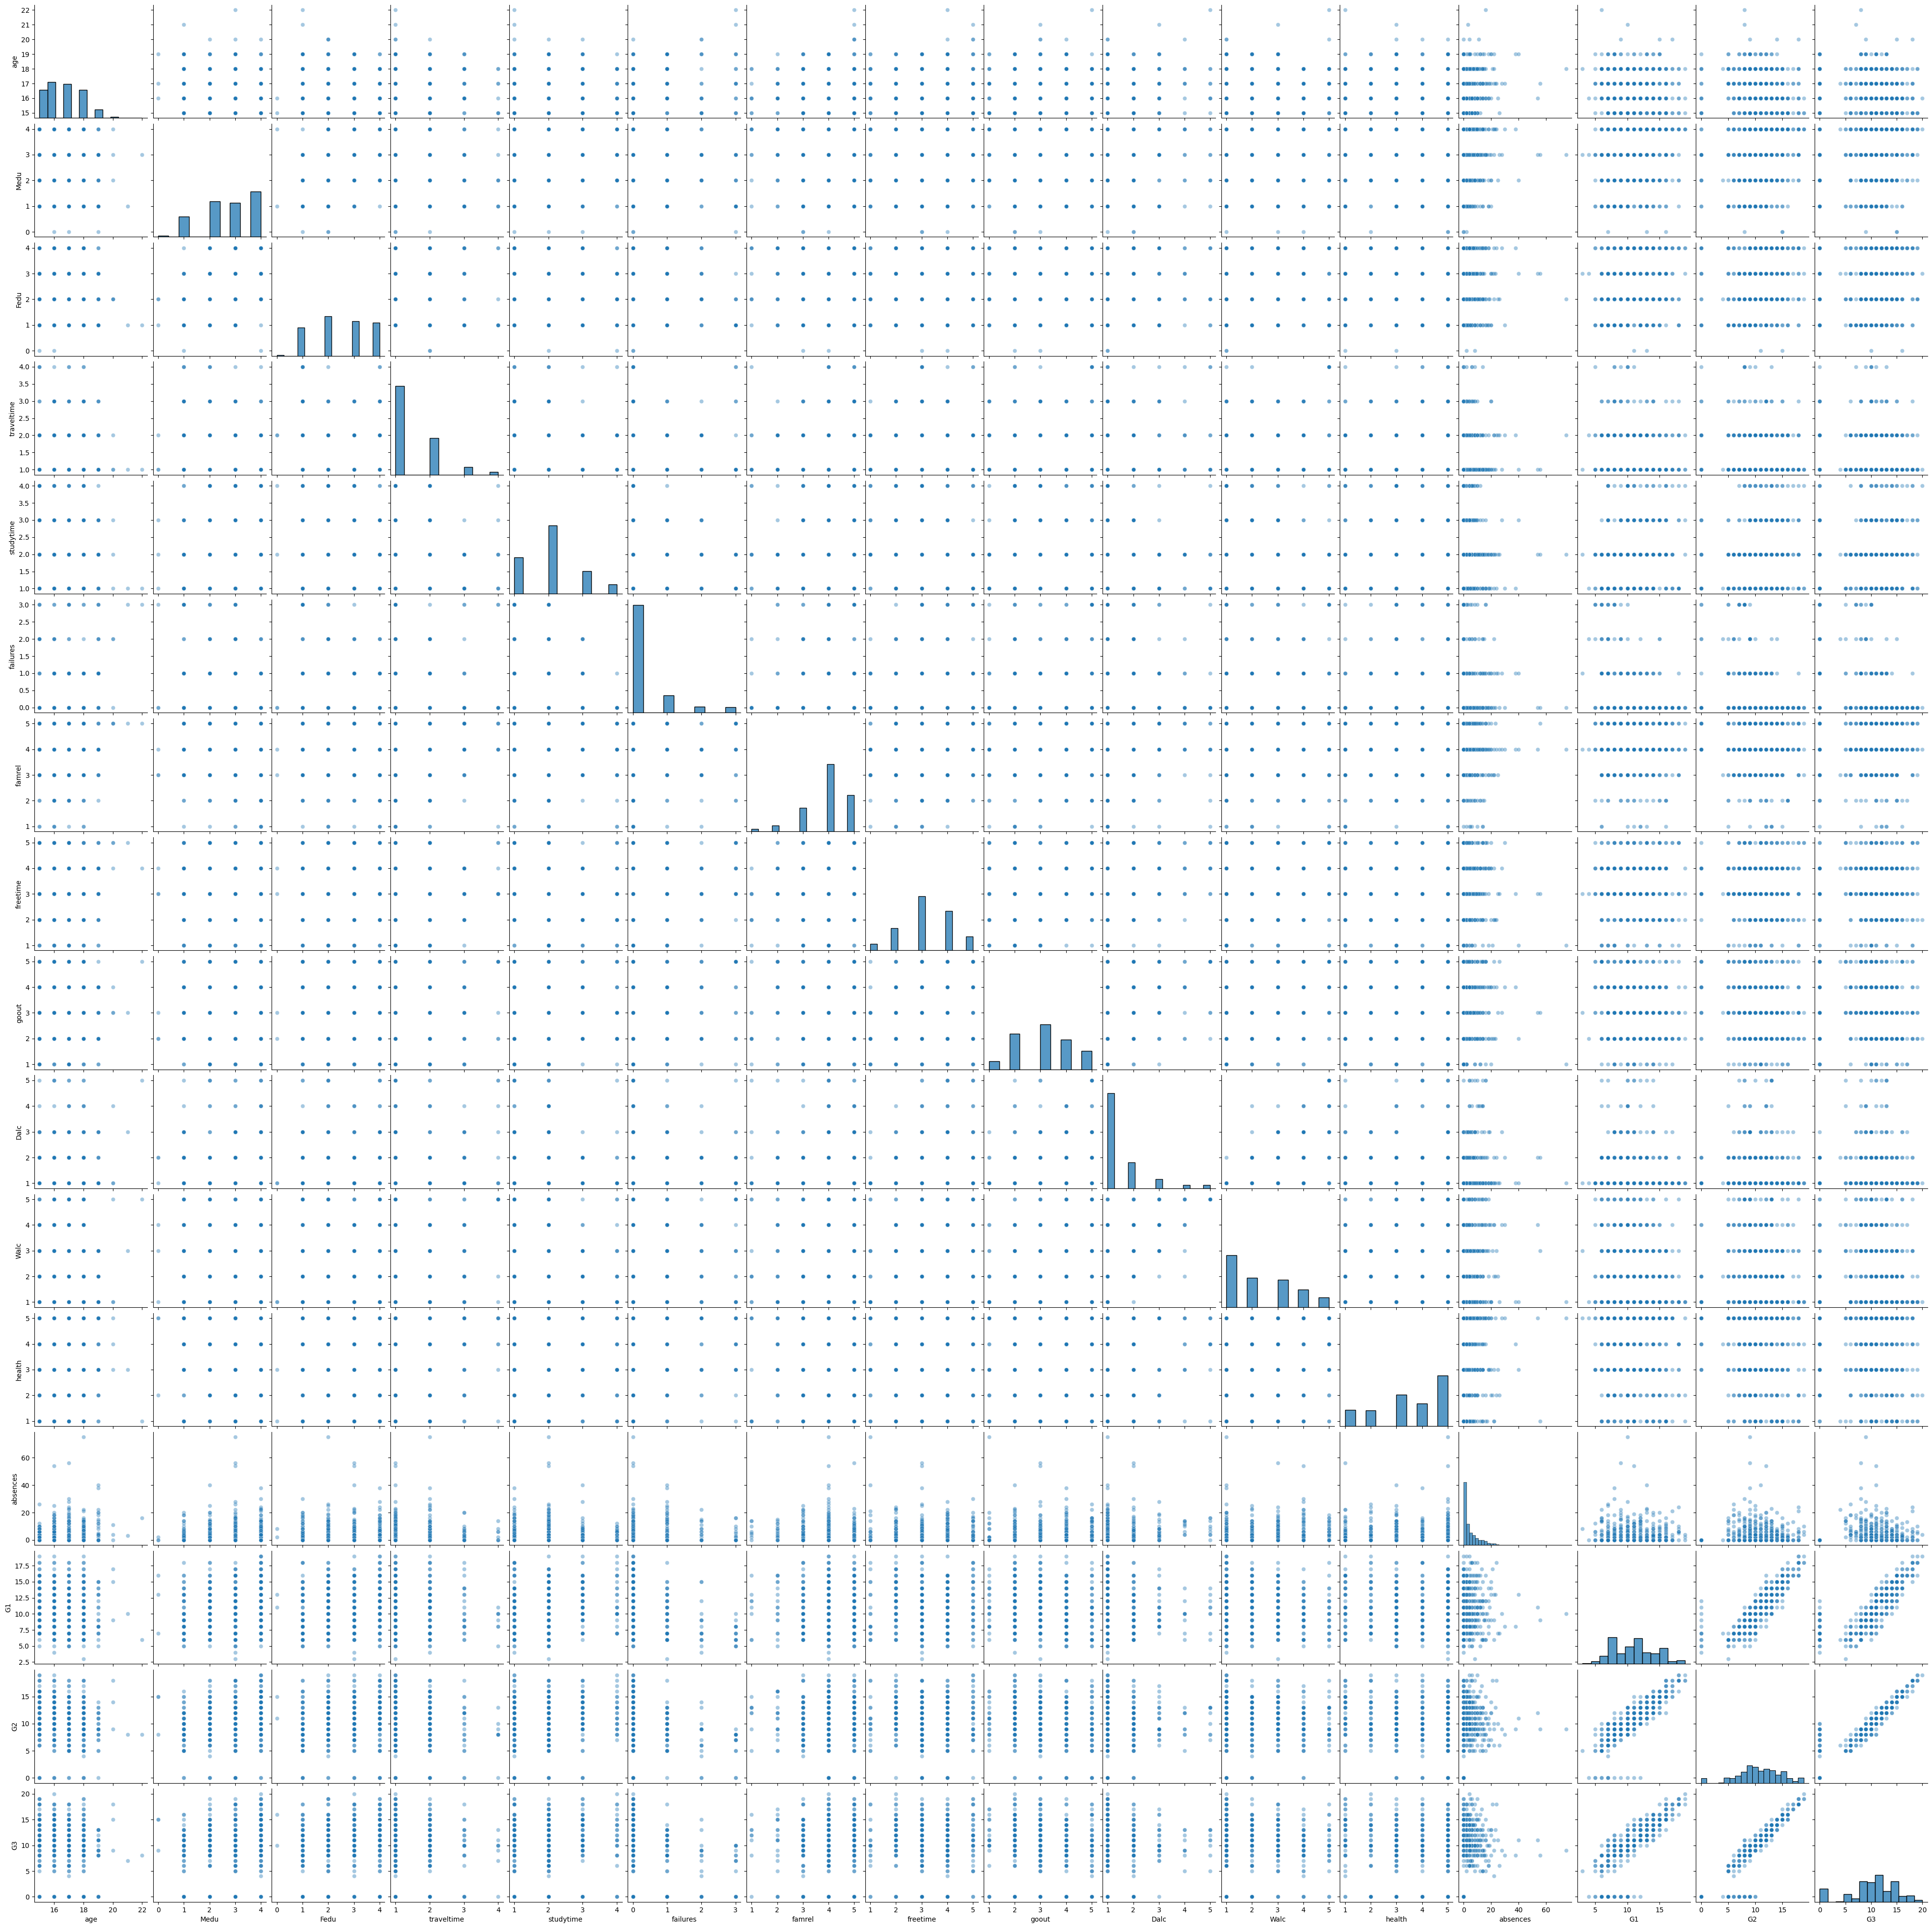

In [4]:
sns.pairplot(df, kind="scatter", plot_kws={'alpha':0.4})

In [5]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
filtered_df = df[df['G3'] != 0]
df= filtered_df

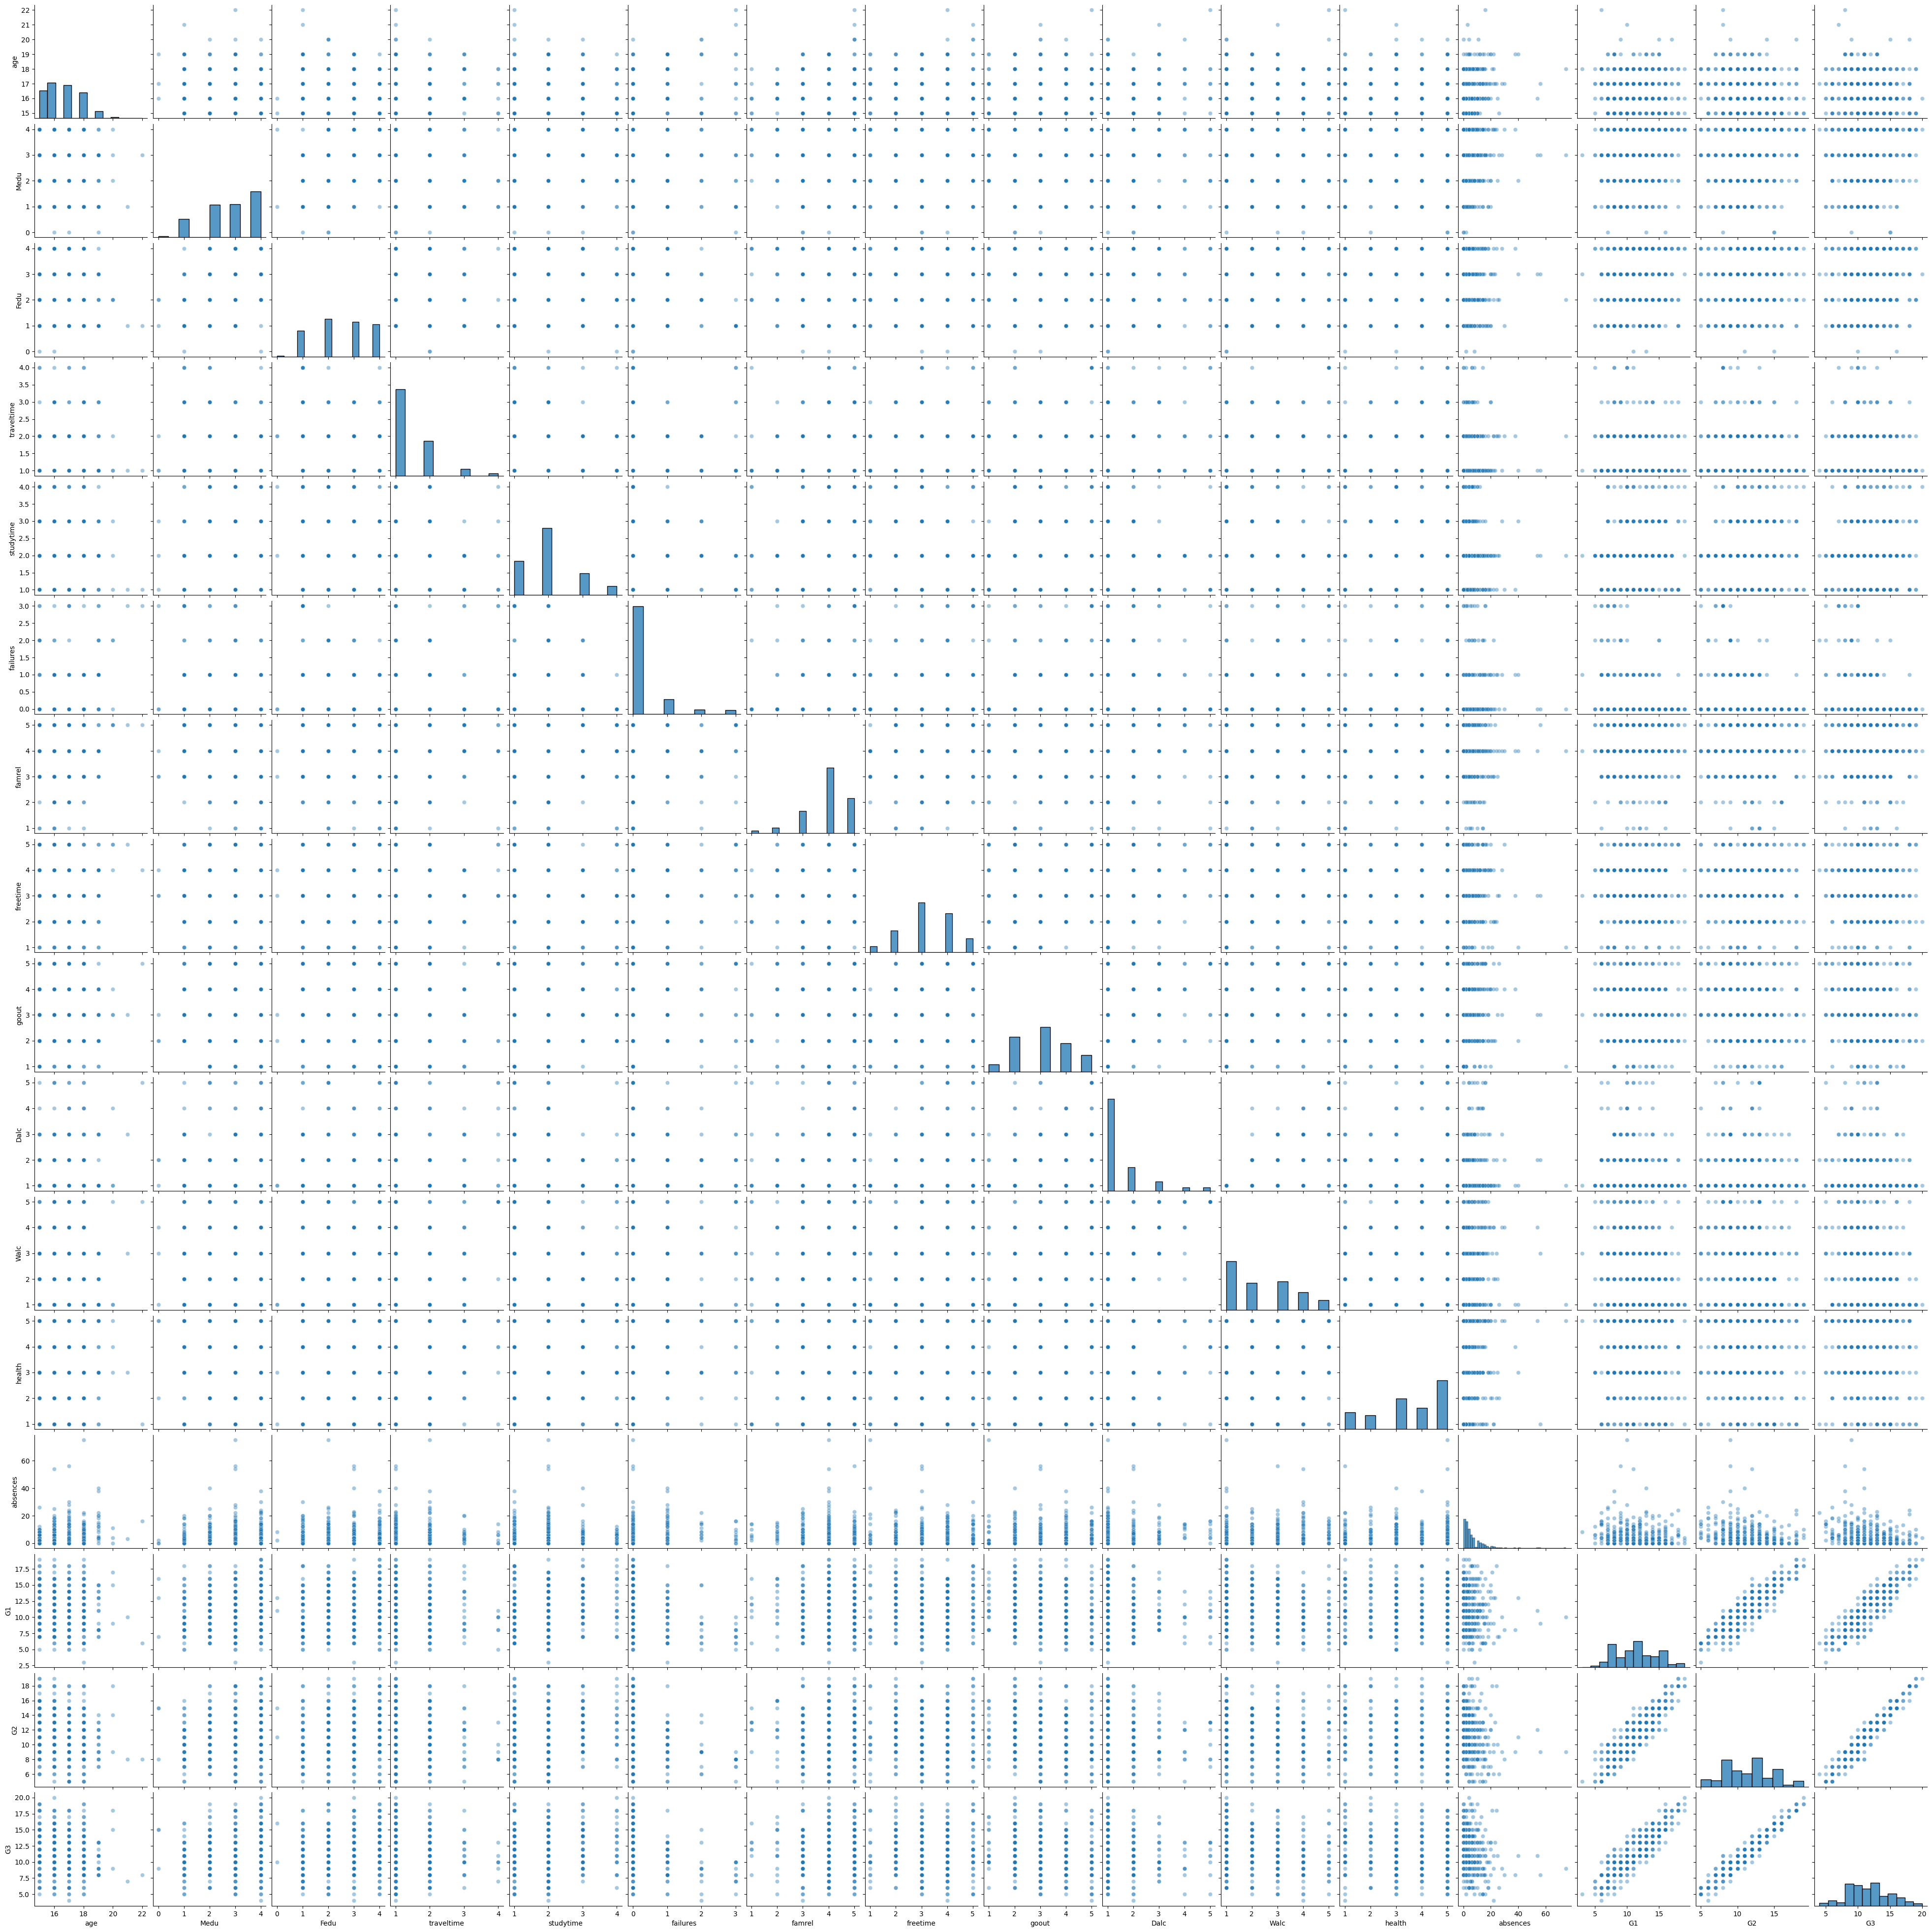

In [7]:
sns.pairplot(df, kind="scatter", plot_kws={'alpha':0.4})

In [8]:
X = df[['G1', 'G2', 'absences','studytime']]
y = df['G3']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print (mse_linear)
print(r2_linear)

0.657202513708478
0.935001949193667


In [12]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print (mse_rf)
print(r2_rf)

0.9203583377057613
0.9089755490181115


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print (mse_gb)
print(r2_gb)

0.7983932754072133
0.921038027706979


In [14]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(mse_dt)
print(r2_dt)

1.4421296296296295
0.8573717948717948


In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(mse_knn)
print(r2_knn)

1.2296296296296294
0.8783882783882784


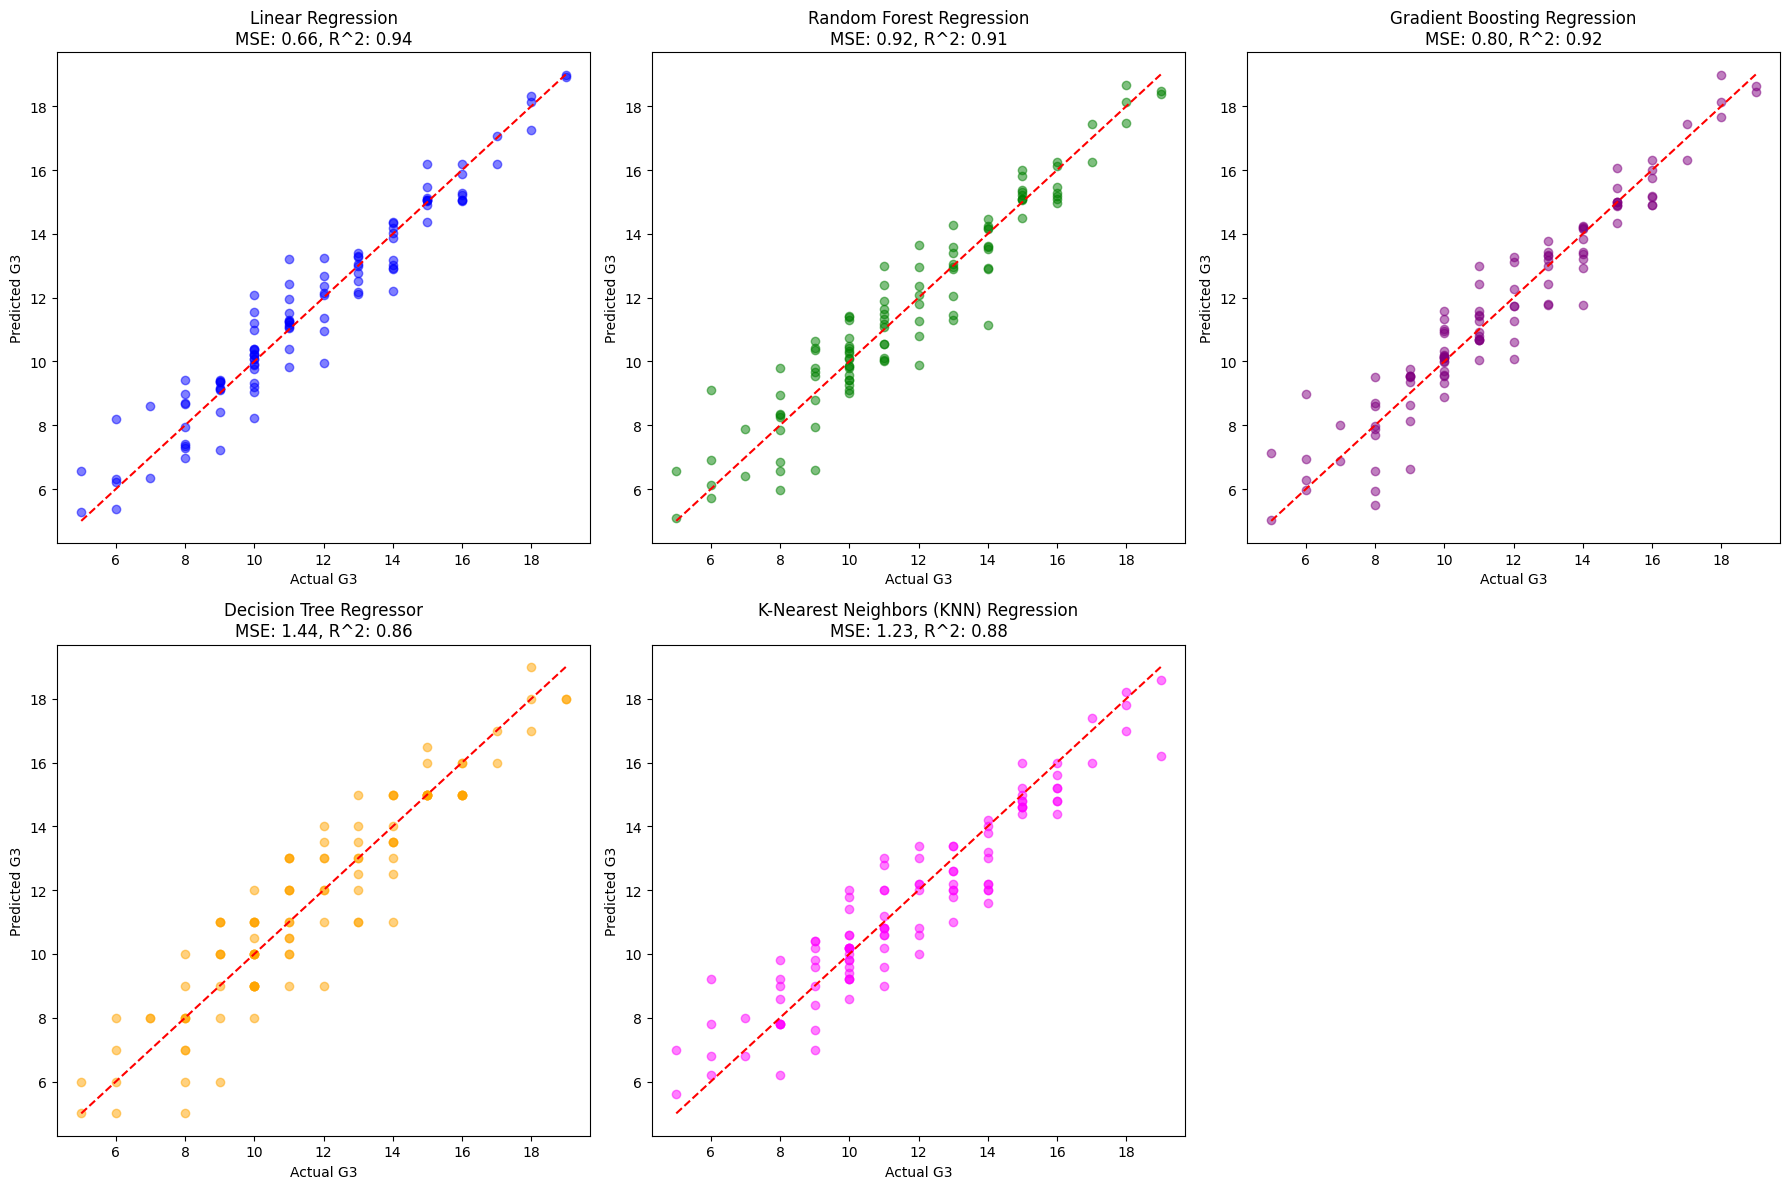

In [16]:
plt.figure(figsize=(18, 12))

# Plot Linear Regression predictions vs. actual values
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Linear Regression\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_linear, r2_linear))

# Plot Random Forest Regression predictions vs. actual values
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Random Forest Regression\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_rf, r2_rf))

# Plot Gradient Boosting Regression predictions vs. actual values
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_gb, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Gradient Boosting Regression\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_gb, r2_gb))

# Plot Decision Tree Regressor predictions vs. actual values
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Decision Tree Regressor\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_dt, r2_dt))

# Plot K-Nearest Neighbors (KNN) Regression predictions vs. actual values
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_knn, color='magenta', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('K-Nearest Neighbors (KNN) Regression\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_knn, r2_knn))

plt.tight_layout()
plt.show()


Now we classify using the passing value of just the G3, we gonna make another column for the passing and classify if passed or not based on the Grade of G3 which needs to add up to 60% or more to pass

In [17]:
pass_threshold = 0.6 * df['G3'].max() 

df['Passed'] = df['G3'] >= pass_threshold

df['Passed'].replace({True: 'Yes', False: 'No'}, inplace=True)

C:\Users\shiko\AppData\Local\Temp\ipykernel_4104\3807757357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Passed'] = df['G3'] >= pass_threshold
C:\Users\shiko\AppData\Local\Temp\ipykernel_4104\3807757357.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Passed'].replace({

In [18]:
df.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... freetime goo

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
X = df[['G3']]  
y = df['Passed']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy_percent = accuracy_score(y_test, y_pred) * 100
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy_percent:.2f}%")
print("Confusion Matrix (in percentages):")
print(conf_matrix_percent)

Accuracy: 1.00
Confusion Matrix:
[[58  0]
 [ 0 50]]
Accuracy: 100.00%
Confusion Matrix (in percentages):
[[100.   0.]
 [  0. 100.]]


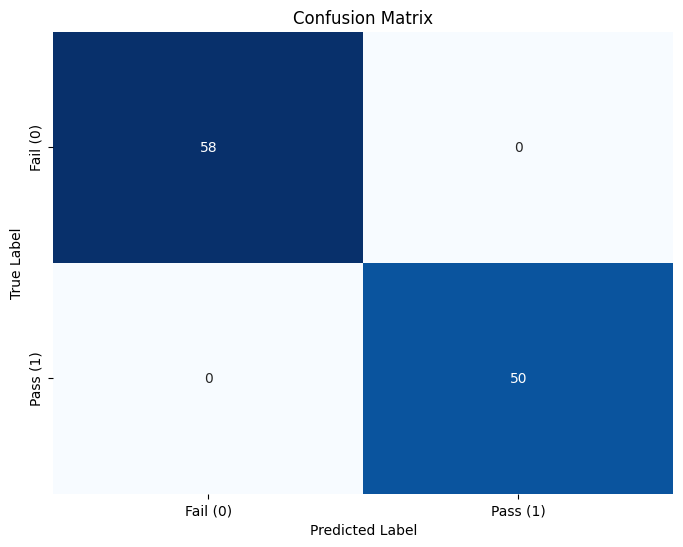

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Fail (0)', 'Pass (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fail (0)', 'Pass (1)'])
plt.show()

In [22]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy_percent = accuracy_score(y_test, y_pred) * 100
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy_percent:.2f}%")
print("Confusion Matrix (in percentages):")
print(conf_matrix_percent)


Accuracy: 1.00
Confusion Matrix:
[[58  0]
 [ 0 50]]
Accuracy: 100.00%
Confusion Matrix (in percentages):
[[100.   0.]
 [  0. 100.]]


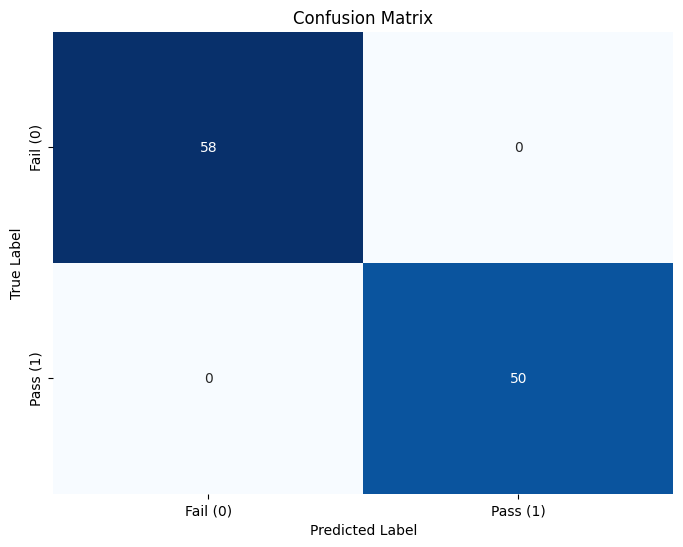

In [23]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Fail (0)', 'Pass (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fail (0)', 'Pass (1)'])
plt.show()


Now instead of classify using the passing value of just the G3, we gonna make another column for the total of all grades and classify if passed or not based on the overall grade of G1,G2,G3 Together which needs to add up to 60% or more to pass

In [24]:
df['TotalScore'] = df['G1'] + df['G2'] + df['G3']

passing_threshold = 0.6 * (df['G1'].max() + df['G2'].max() + df['G3'].max())

df['Passed'] = df['TotalScore'] >= passing_threshold

df['Passed'] = df['Passed'].map({True: 'Yes', False: 'No'})

print(df[['G1', 'G2', 'G3', 'TotalScore', 'Passed']])

     G1  G2  G3  TotalScore Passed
0     5   6   6          17     No
1     5   5   6          16     No
2     7   8  10          25     No
3    15  14  15          44    Yes
4     6  10  10          26     No
..   ..  ..  ..         ...    ...
390   9   9   9          27     No
391  14  16  16          46    Yes
392  10   8   7          25     No
393  11  12  10          33     No
394   8   9   9          26     No

[357 rows x 5 columns]


C:\Users\shiko\AppData\Local\Temp\ipykernel_4104\3262193477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalScore'] = df['G1'] + df['G2'] + df['G3']
C:\Users\shiko\AppData\Local\Temp\ipykernel_4104\3262193477.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Passed'] = df['TotalScore'] >= passing_threshold
C:\Users\shiko\AppData\Local\Temp\ipykernel_4104\3262193477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [25]:
X = df[['TotalScore']]  
y = df['Passed']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy_percent = accuracy_score(y_test, y_pred) * 100
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy_percent:.2f}%")
print("Confusion Matrix (in percentages):")
print(conf_matrix_percent)

Accuracy: 1.00
Confusion Matrix:
[[56  0]
 [ 0 52]]
Accuracy: 100.00%
Confusion Matrix (in percentages):
[[100.   0.]
 [  0. 100.]]


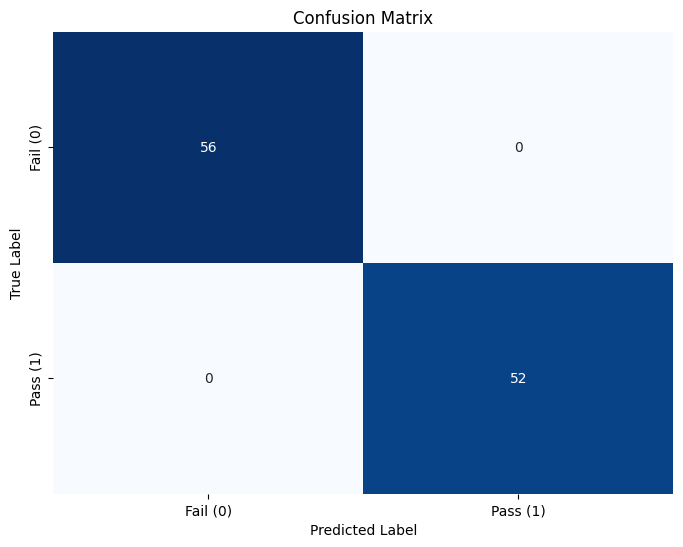

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Fail (0)', 'Pass (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fail (0)', 'Pass (1)'])
plt.show()

In [27]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy_percent = accuracy_score(y_test, y_pred) * 100
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy_percent:.2f}%")
print("Confusion Matrix (in percentages):")
print(conf_matrix_percent)

Accuracy: 1.00
Confusion Matrix:
[[56  0]
 [ 0 52]]
Accuracy: 100.00%
Confusion Matrix (in percentages):
[[100.   0.]
 [  0. 100.]]


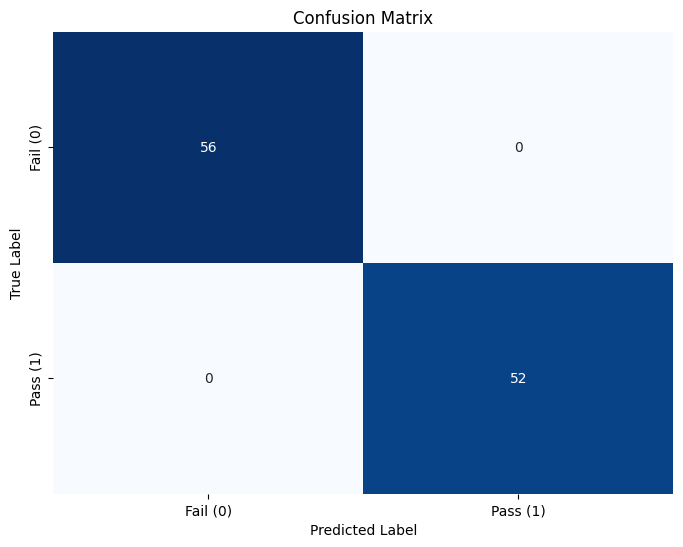

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Fail (0)', 'Pass (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fail (0)', 'Pass (1)'])
plt.show()